# 1.) Pull in Data and Convert ot Monthly

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]
df.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097592
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [17]:
df['Price Difference'] = df['Adj Close'].diff().shift(-1)
df['Price Movement'] = np.sign(df["Price Difference"])
df["Option premium"]=.08*df["Adj Close"]
df.head()
#if false positve then we lose -100
#premium earned is true positive

,Adj Close,Price Difference,Price Movement,Option premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [19]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])
X.head()

,VAR1
Date,
1980-12-31,0.163261
1981-01-31,0.437449
1981-02-28,-0.334994
1981-03-31,2.550820
1981-04-30,3.170655


In [20]:
y = df.loc[:"2023-09-30","Price Movement"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [21]:
logreg=LogisticRegression().fit(X,y)

y_pred=logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [22]:
df["Predictions"]=y_pred

In [23]:
df['Profits'] = 0.

#true positves
df.loc[(df["Predictions"] ==1)& (df["Price Movement"]==1), "Pofits"] = df["Option premium"]
#false positives
df.loc[(df["Predictions"] ==1)& (df["Price Movement"]==-1), "Profits"] = 100*df["Price Difference"] + df["Option premium"]


# 5.) Plot profits over time

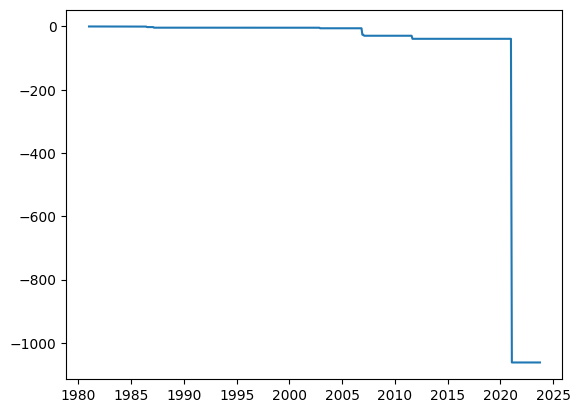

In [24]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

Write a short write on how your skills from MQE, help mr lius ventures.

Something that I would like to add to add to Mr Luis's ventures would be the idea of using paper trading for ameteurs like us to undertsand the trading in crytpocurrency. I feel a platform where there is discussion and engagement, as well as oppurutnities for trading, if a feature to include no-money trading, to learn the know-hows of the crypto market, or to use this feature to run efficient quantitative trading strtagies, we can increase the use case of the platform. 

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.